In [59]:
import numpy as np
from Library_Classworks import crank_nicolson

In [60]:
z_min = 0
z_max = 10

t_min = 0
t_max = 6

nx = 100
nt = 1000


a1 = 887.258
b1 = 469.858

def g(x):
    return (5*np.exp(-1*a1*x))*np.sin(-1*b1*x) +20

def a(t):
    return 20 + 5*np.sin(2*np.pi*t/24)

def b(t):
    return 0


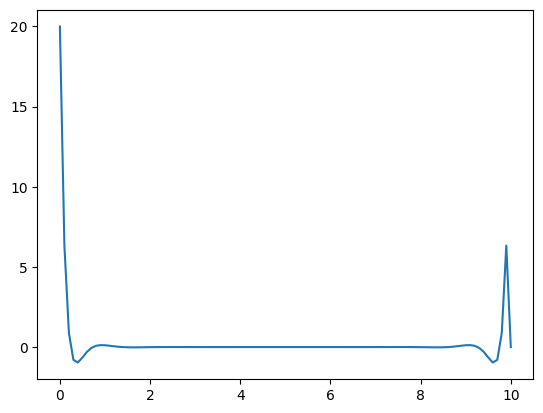

In [65]:
x,T,t = crank_nicolson(g,a,b,z_min,z_max,t_min,t_max,nx,nt,250,k=0.0005)

import matplotlib.pyplot as plt
plt.plot(x,T)
# plt.xlim(0,2)
plt.show()

